# Netflix Data Exploration Business Case

# Overview:

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.
* The particular business case focuses on the Netflix show data and provides insightful information on 8807 shows

## Objective:

The objective of this case study is to analyze the data and generating insights helps Netflix decide which type of shows/movies to produce and how to grow the business.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df = pd.read_csv('netflix.csv')

In [3]:
#checking the shape
df.shape

(8807, 12)

In [4]:
#checking columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#Viewing data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#viewing data
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 🔍 Insights

#### From the above analysis, it is seen that the data contains information about 8807 shows.The data contains below features:

* Show ID : The ID of the show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description


### Data Types and Missing Values:

* Most columns are of object type, suggesting they contain text data.
* release_year is the only integer type column, representing numerical data.
* duration is also numeric data, but currently stored as object type. It may need conversion.
* Several columns have missing values, such as director, cast,duration, rating and country. These missing values might need to be handled during data processing.

### Statistical Analysis

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### Insights:
* **Type of content**: Out of the 8807 items available on Netflix, 6131 are movies, making up nearly 70% of the total content. The remaining 30% consists of TV Shows.
* **Director**: Rajiv Chilaka tops the director list with 19 credits to his name.
* **Cast** : David Attenborough leads the actor list with 19 appearances in various films and shows on Netflix.
* **Country** :The USA ranks at the top as the country with the highest production contribution to Netflix, contributing 35% of the total content.
* **Date Added** : January 1, 2020, stands out as the peak date for content uploads on Netflix. On that day alone, approximately 109 different shows and movies were added to the platform.
* **Ratings** :Netflix offers 17 different types of ratings. The "TV-MA" (Mature Audience Only) rating dominates, covering almost 36% of the total shows and movies on the platform with this rating.

### Basic Analysis

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Handling null values

📍 Approach to fill missing values
1. Director Column - Filling it with Unknown Director

2. Cast Column - Filling it with Unknown Cast

3. Country Column - Filling it with Unknown Country

4. Rating : Replace with mode, based on the type of show(i.e. Movie or TV Show)

5. Duration:  Replace with mode, based on the type of show(i.e. Movie or TV Show)

The remaining missing values will be dropped.

In [11]:
#Checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)

In [13]:
# Finding the mode rating for movies and TV shows
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

# Filling missing rating values based on the type of content
df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

In [14]:
# Finding the mode duration for movies and TV shows
movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]

# Filling missing duration values based on the type of content
df['duration'] = df.apply(lambda x: movie_duration_mode if x['type'] == 'Movie' 
                          and pd.isna(x['duration'])
                          else tv_duration_mode if x['type'] == 'TV Show' 
                          and pd.isna(x['duration'])
                          else x['duration'], axis=1)

In [15]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [16]:
#Checking missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Outliers Check

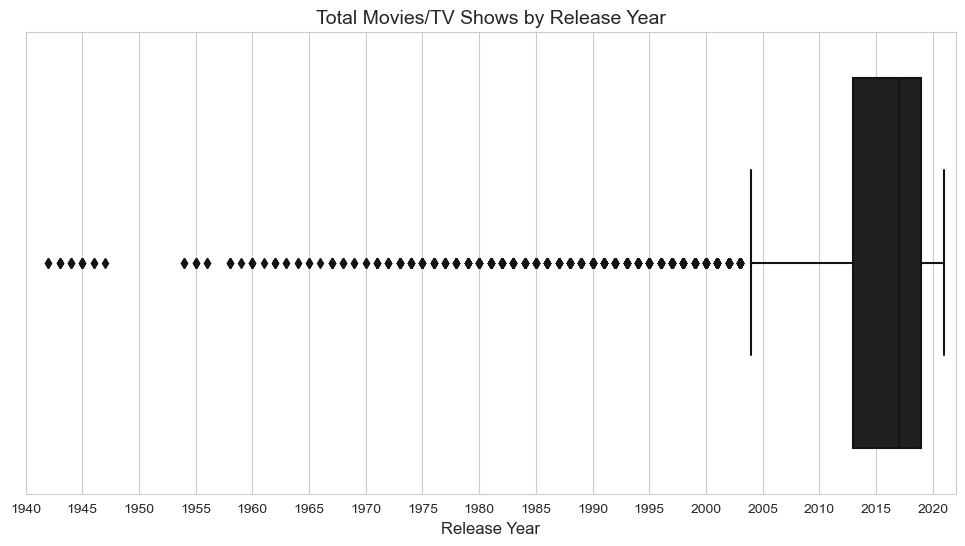

In [17]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Setting Netflix theme
sns.boxplot(data=df, x='release_year', color='#221f1f')  # Using Netflix color for boxplot
plt.xlabel('Release Year', fontsize=12)
plt.title('Total Movies/TV Shows by Release Year', fontsize=14)
plt.xticks(np.arange(1940, 2021, 5), fontsize=10)
plt.yticks(fontsize=10)
plt.xlim((1940, 2022))
plt.show()

##  Insights:

* It is seen that most of the movies are released between 2017-2019.
* It can be observed that, very few movies were relesed between 194 till early thousands, which is casuing ouliers.

# Checking Duplicates

In [18]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

## ➕ Adding new columns for better analysis

In [19]:
# converting date_added to datetime column
df['date_added'] = pd.to_datetime(df['date_added']) 

#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

### Data Transformation ➗ Un-nesting the columns for better analysis

* We will create a new df which has un-nested director,cast,country, listed_in columns into multiple rows which will help while doing analysis related to them.

In [20]:
# creating a separate dataframe
df1 = copy.deepcopy(df)


df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")
df1['listed_in'] = df["listed_in"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1 = df1.explode(['listed_in'])
df1.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,38


### Graphical and Nongraphical Analysis for Categorical Columns

### Content Distribution

In [21]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

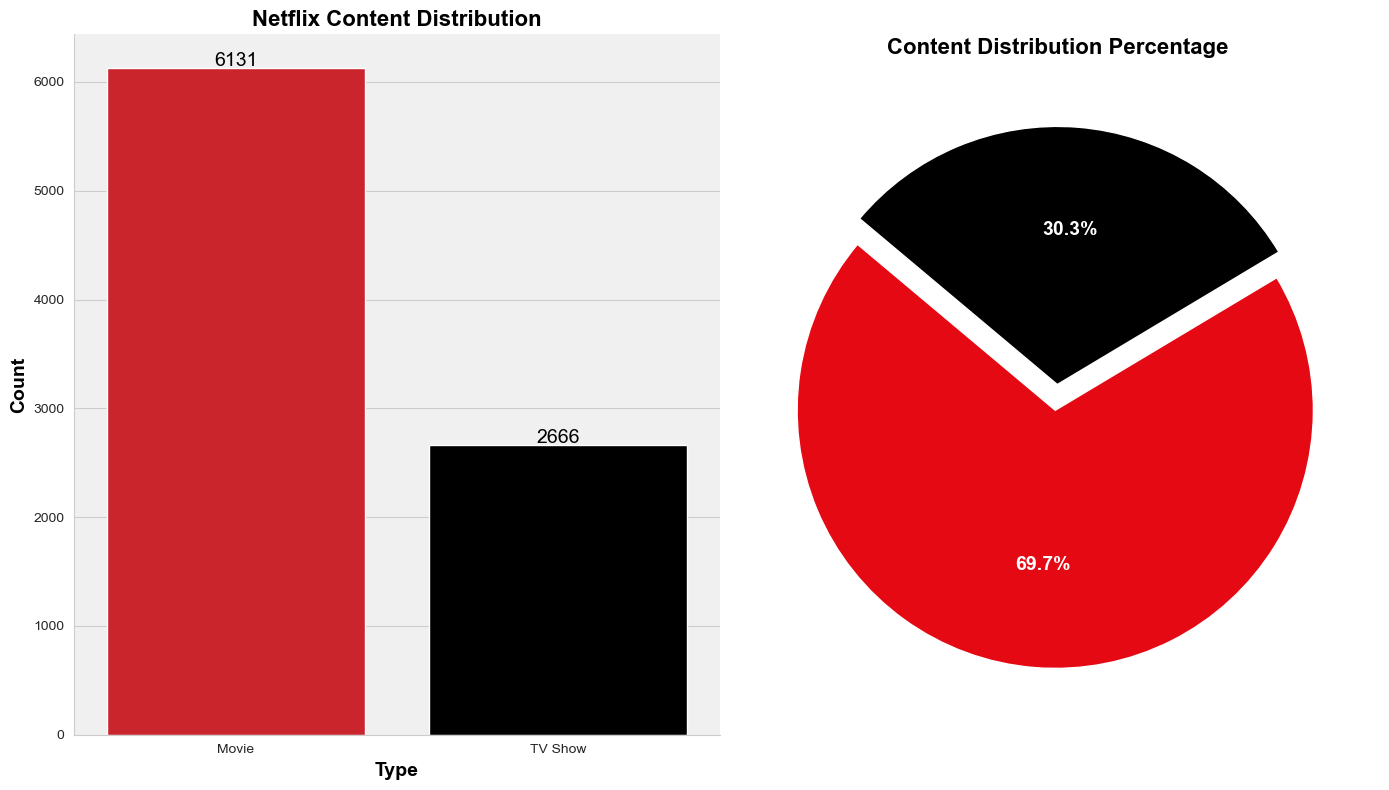

In [22]:
# Define Netflix color palette for movies and TV shows
netflix_colors = {'Movie': '#E50914', 'TV Show': 'black'}

# Create count plot with specified palette
plt.figure(figsize=(14, 8))

# Add subplot for the count plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='type', data=df, palette=netflix_colors)

# Set background color
plt.gca().set_facecolor('#f0f0f0')

# Add title and labels
plt.title('Netflix Content Distribution', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Type', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')

# Change bar appearance and add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add subplot for the pie chart
plt.subplot(1, 2, 2)
sizes = df['type'].value_counts(normalize=True) * 100
labels = sizes.index
colors = [netflix_colors[label] for label in labels]

explode = (0.1, 0)
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', explode= explode,startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold',
                                                                                                          'color': 'white'})
plt.title('Content Distribution Percentage', fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

### Insights:

* Among the 8807 items available on Netflix, 6131 of them are movies, accounting for nearly 70% of the total content. The remaining 30% consists of TV Shows.

### Movies & TV Shows Added Over Time

In [23]:
df['year_added'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010])

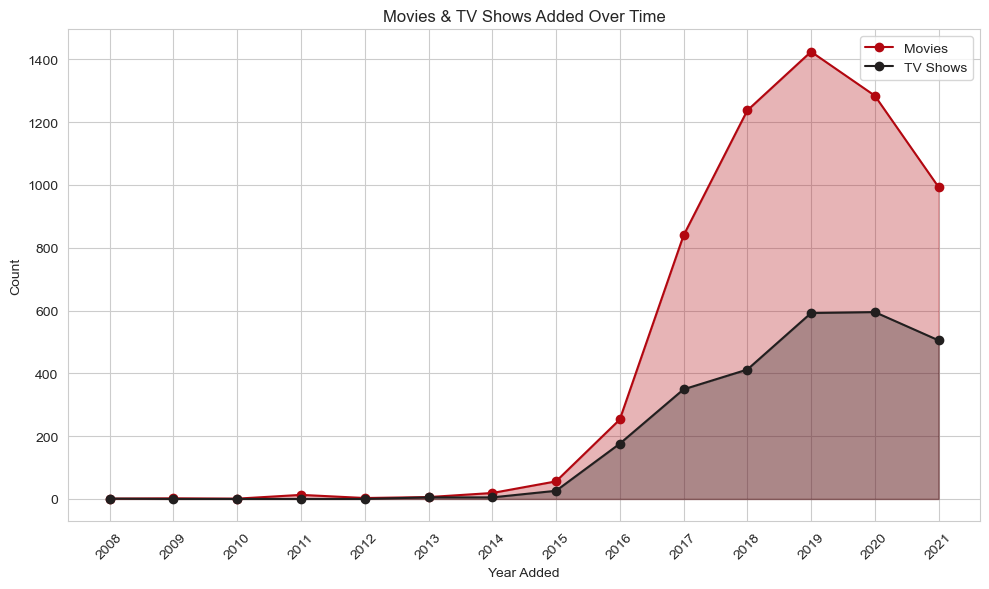

In [24]:
# Group by 'year_added' and 'type' and count the number of movies and TV shows added each year
yearly_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts['Movie'], label='Movies', marker='o', color='#b20710')
plt.plot(yearly_counts.index, yearly_counts['TV Show'], label='TV Shows', marker='o', color='#221f1f')
plt.fill_between(yearly_counts.index, yearly_counts['Movie'], color='#b20710', alpha=0.3)
plt.fill_between(yearly_counts.index, yearly_counts['TV Show'], color='#221f1f', alpha=0.3)
plt.title('Movies & TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(yearly_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Insights:

* The line chart depicts the quantity of movies and TV shows added to Netflix over time, providing a visual representation of content growth and trends, with distinct lines for films and TV series.
* Netflix experienced substantial growth starting from 2015, with a notable increase in the addition of movies compared to TV shows over the years.
* It is worth noting that there was a decrease in content addition in 2020, which may be attributed to the pandemic situation.

### Number of Movies Released per Year (Last 30 Years)

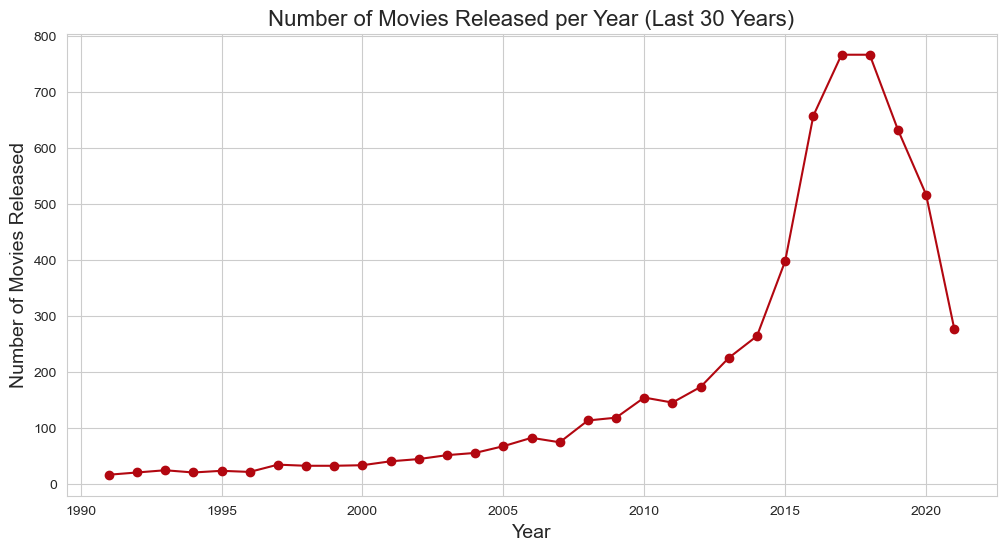

In [25]:
# Filter the dataset to include only movies
movies_df = df[df['type'] == 'Movie']

# Convert release_year column to numeric
movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')

# Filter movies released in the last 30 years
movies_last_30_years = movies_df[movies_df['release_year'] >= (movies_df['release_year'].max() - 30)]

# Group the data by release year and count the number of movies released each year
movies_per_year = movies_last_30_years.groupby('release_year').size()

# Plotting
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', color='#b20710', marker='o')

# Add title and labels
plt.title('Number of Movies Released per Year (Last 30 Years)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.grid(True)

In [26]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

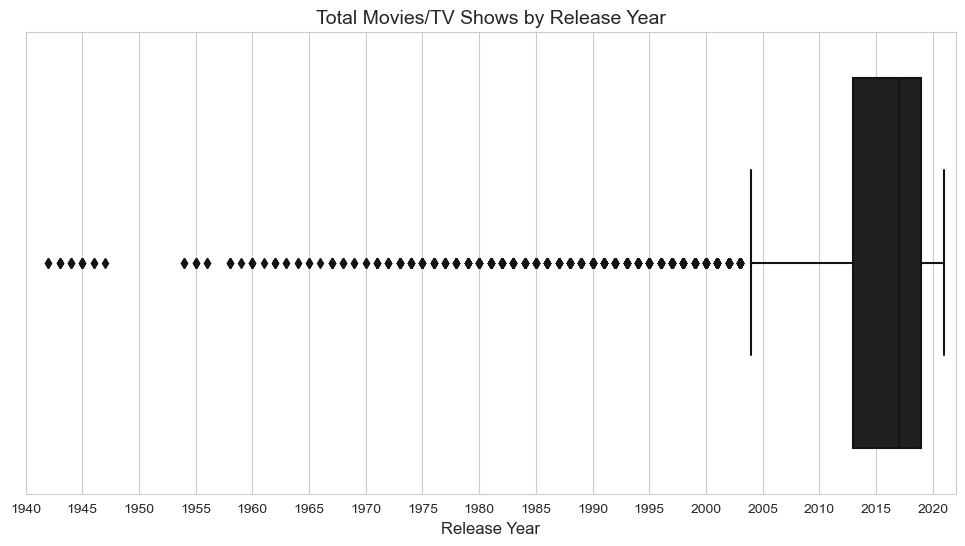

In [27]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Setting Netflix theme
sns.boxplot(data=df, x='release_year', color='#221f1f')  # Using Netflix color for boxplot
plt.xlabel('Release Year', fontsize=12)
plt.title('Total Movies/TV Shows by Release Year', fontsize=14)
plt.xticks(np.arange(1940, 2021, 5), fontsize=10)
plt.yticks(fontsize=10)
plt.xlim((1940, 2022))
plt.show()

## Insights:

* Recent years, particularly 2017-2019, have seen a significant increase in the number of movie releases, with 2018 being the peak year at 1146 movies.
* There's a consistent upward trend in movie production over the years, especially noticeable since the early 2000s, indicating a growing film industry.
* The early 2000s marked a period of substantial growth in movie production, suggesting advancements in technology and changing audience demands.
* Although there were slight dips in the late 2000s, the overall trend shows a resilient and evolving film industry, adapting to technological and societal changes.

In [28]:
df['title'].nunique()

8797

In [29]:
df1['director'].nunique()

4994

In [30]:
df1['cast'].nunique()

36404

In [31]:
df1['country'].nunique()

128

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [34]:
df['duration'].value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
90 min         155
94 min         146
97 min         146
93 min         146
91 min         144
95 min         137
96 min         130
92 min         129
102 min        122
98 min         120
99 min         118
101 min        116
88 min         116
103 min        114
106 min        111
100 min        108
89 min         106
104 min        104
86 min         103
105 min        101
87 min         101
107 min         98
110 min         97
4 Seasons       94
108 min         87
116 min         80
112 min         74
85 min          73
113 min         69
109 min         69
111 min         68
84 min          67
118 min         65
83 min          65
5 Seasons       64
119 min         63
81 min          62
115 min         61
117 min         61
120 min         56
114 min         56
121 min         54
82 min          52
124 min         52
127 min         48
122 min         45
78 min          45
123 min         44
126 min         44
80 min      

In [35]:
df['rating'].value_counts()

TV-MA       3209
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

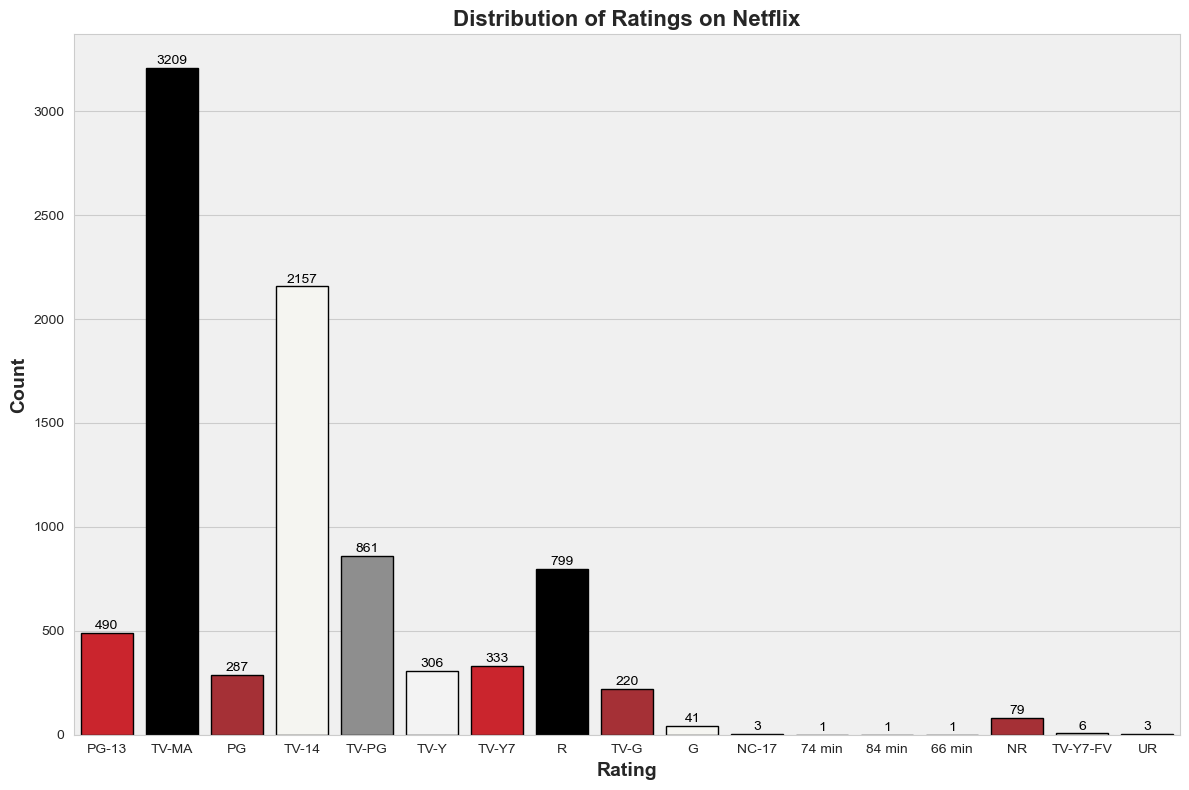

In [36]:
# Define a custom color palette with colors distinct from the background
netflix_palette = ['#E50914', '#000000', '#B81D24', '#F5F5F1', '#8E8E8E', '#F3F3F3']

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='rating', data=df, palette=netflix_palette, edgecolor='black')  # Add edgecolor

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Add title and labels
plt.title('Distribution of Ratings on Netflix', fontsize=16, fontweight='bold')  # Update title
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Change bar appearance
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Insights:

* TV-MA (Mature Audience) is the most common rating, indicating content intended for mature audiences with strong language, violence, and sexual content. This suggests that Netflix caters to a predominantly adult audience, with 3207 titles falling under this rating.
* TV-14 (Parents Strongly Cautioned) is the second most common rating, indicating that the program may be inappropriate for children under 14 due to intense violence, suggestive dialogue, and strong language. There are 2160 titles with this rating.
* TV-PG (Parental Guidance Suggested), found in 863 titles, suggests that the program may contain material unsuitable for younger children but generally suitable for all ages with parental guidance.
* R (Restricted), seen in 799 titles, indicates content suitable only for adults due to strong language, violence, and adult themes.
* PG-13 (Parents Strongly Cautioned - 13 and Older), with 490 titles, suggests that the program may be inappropriate for children under 13 due to strong language, moderate violence, and some suggestive content.
* TV-Y7 (Directed to Older Children), found in 334 titles, is suitable for children aged 7 and older and may contain mild fantasy violence, mild coarse language, and minimal suggestive themes.
* TV-Y (All Children), with 307 titles, is suitable for all children and contains little or no violence, strong language, or sexual dialogue or situations.
* PG (Parental Guidance Suggested), seen in 287 titles, indicates that the program may contain material unsuitable for younger children but generally suitable with parental guidance.
* TV-G (General Audience), found in 220 titles, is suitable for all ages with little or no violence, strong language, or sexual content.
* NR (Not Rated), indicates that the program does not have a rating. It may include documentaries, foreign films, or other content not subjected to the standard rating system.
* G (General Audience), with 41 titles, is suitable for all ages with no offensive language, violence, or sexual content.
* TV-Y7-FV (Directed to Older Children - Fantasy Violence), seen in 6 titles, indicates content containing fantasy violence and is suitable for children aged 7 and older.
* NC-17 (Adults Only), found in 3 titles, is suitable only for adults aged 18 and older due to explicit content such as strong sexual content, graphic violence, or explicit language.
* UR (Unrated) indicates that the program does not have a rating. It may contain controversial or adult content.

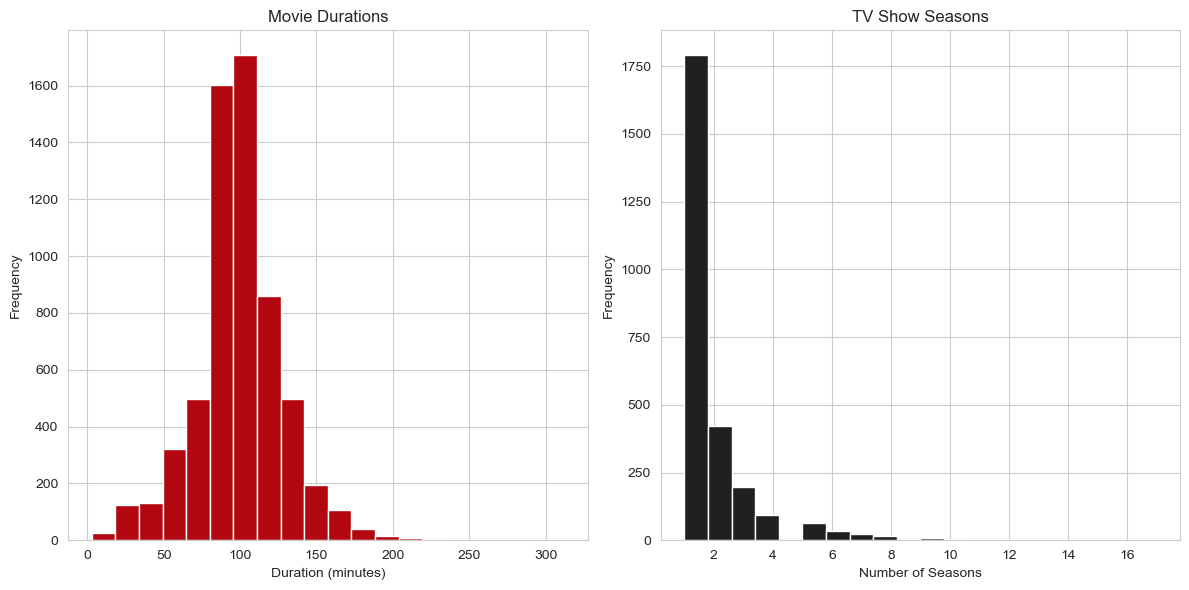

In [37]:
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# For movies: Convert duration to minutes
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

# For TV shows: Extract number of seasons
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)')
tv_shows['num_seasons'] = tv_shows['num_seasons'].astype(float)

# Plot
plt.figure(figsize=(12, 6))

# For movies
plt.subplot(1, 2, 1)
plt.hist(movies['duration'], bins=20, color='#b20710')
plt.title('Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# For TV shows
plt.subplot(1, 2, 2)
plt.hist(tv_shows['num_seasons'], bins=20, color='#221f1f')
plt.title('TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###  Insights on Movies Duration :

* Durations between 90 and 110 minutes are quite common, indicating a typical range for movie durations.
* There is a significant drop in frequency for durations beyond 110 minutes, suggesting that longer movies are less common.
* Some movies have very short durations, with a few lasting less than 30 minutes, indicating short films or documentaries.
* There are also a few movies with extremely long durations, with one movie lasting over 4 hours.

### Insights on TV Shows Duration:
* The majority of TV shows in the dataset have 1 or 2 seasons, with 1 season being the most common.
* There is a significant number of TV shows with 3 to 5 seasons, indicating a balance between short-term and medium-term storytelling.
* Fewer TV shows have more than 5 seasons, suggesting the presence of long-running series, although these are less common.
* Overall, there is a diverse range of TV show durations, with a notable concentration in shorter formats.

## Comparison of TV Shows vs. Movies

### Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.

In [38]:
movies_df = df1[(df1['type'] == 'Movie') & (df1['country'] != 'Unknown country')]

In [39]:
# Group by country and count unique titles
country_movie_counts = movies_df.groupby('country')['title'].nunique().reset_index()
country_movie_counts.columns = ['Country', 'Number of Movies']

In [40]:
country_movie_counts

,Country,Number of Movies
0,,1
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
5,Argentina,71
6,Armenia,1
7,Australia,94
8,Austria,11
9,Bahamas,1


In [41]:
# Sort by number of movies in descending order
country_movie_counts = country_movie_counts.sort_values(by='Number of Movies', ascending=False)

In [42]:
# Pick the top 10 countries
top_10_countries = country_movie_counts.head(10)
print(top_10_countries)

            Country  Number of Movies
114   United States              2751
43            India               962
112  United Kingdom               532
20           Canada               319
34           France               303
36          Germany               182
100           Spain               171
51            Japan               119
23            China               114
65           Mexico               111


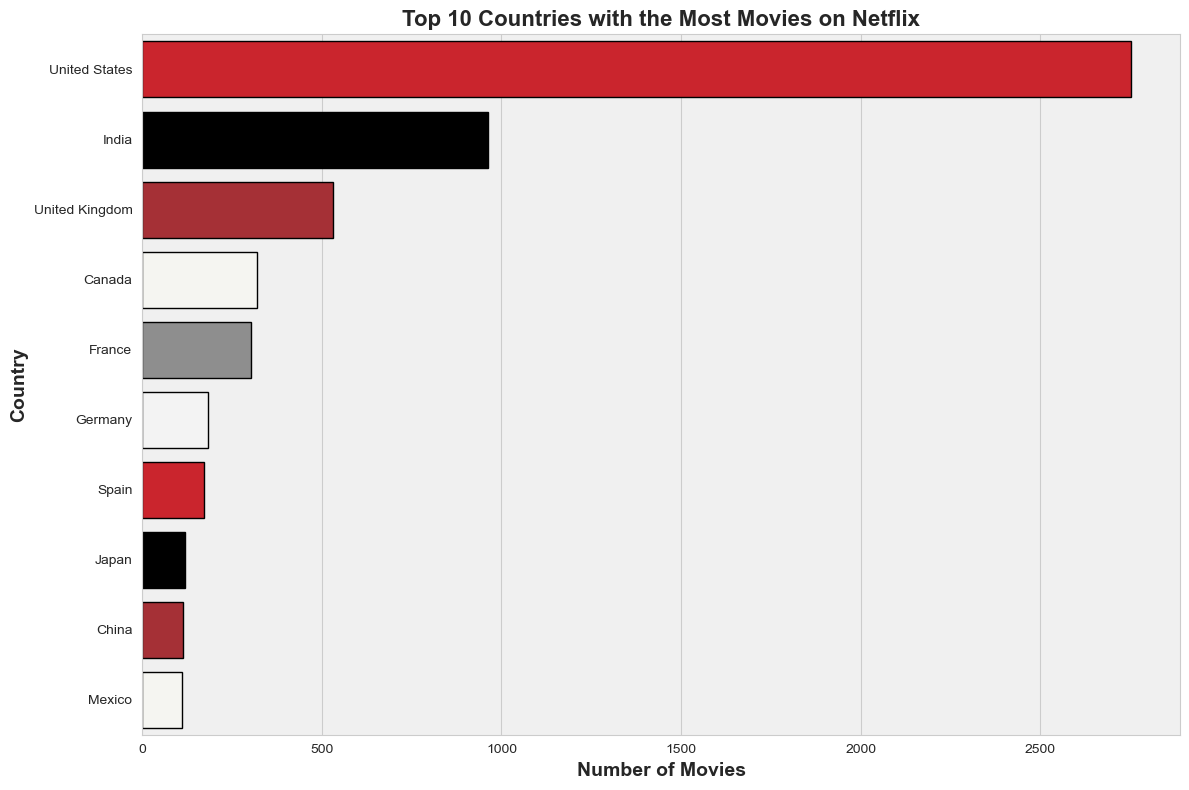

In [43]:
# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Number of Movies', y='Country', data=top_10_countries, palette=netflix_palette)

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Add a black border around each bar
for patch in ax.patches:
    patch.set_edgecolor('black')

# Add title and labels
plt.title('Top 10 Countries with the Most Movies on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Insights:

* From the bar graph, it is evident that the United States is the leading market for Netflix movies, with a substantial number of 2751 titles. This suggests a strong foothold and popularity of Netflix among American viewers. 
* Following the United States, India and the United Kingdom also show significant numbers of movies, with 962 and 532 titles respectively, indicating Netflix's growing presence and popularity in these regions.

In [44]:
shows_df = df1[(df1['type'] == 'TV Show') & (df1['country'] != 'Unknown country')]

In [45]:
country_shows_counts = shows_df.groupby(by = 'country')['title'].nunique().reset_index()
country_shows_counts.columns = ['Country', 'Number of Shows']

In [46]:
country_shows_counts 

,Country,Number of Shows
0,,1
1,Argentina,20
2,Australia,65
3,Austria,1
4,Azerbaijan,1
5,Belarus,1
6,Belgium,12
7,Brazil,31
8,Canada,126
9,Chile,5


In [47]:
# Sort by number of movies in descending order
country_shows_counts  = country_shows_counts.sort_values(by='Number of Shows', ascending=False)

In [48]:
# Pick the top 10 countries
top_10_countries = country_shows_counts.head(10)
print(top_10_countries)

           Country  Number of Shows
63   United States              932
62  United Kingdom              271
30           Japan              198
52     South Korea              170
8           Canada              126
19          France               90
25           India               84
57          Taiwan               70
2        Australia               65
53           Spain               61


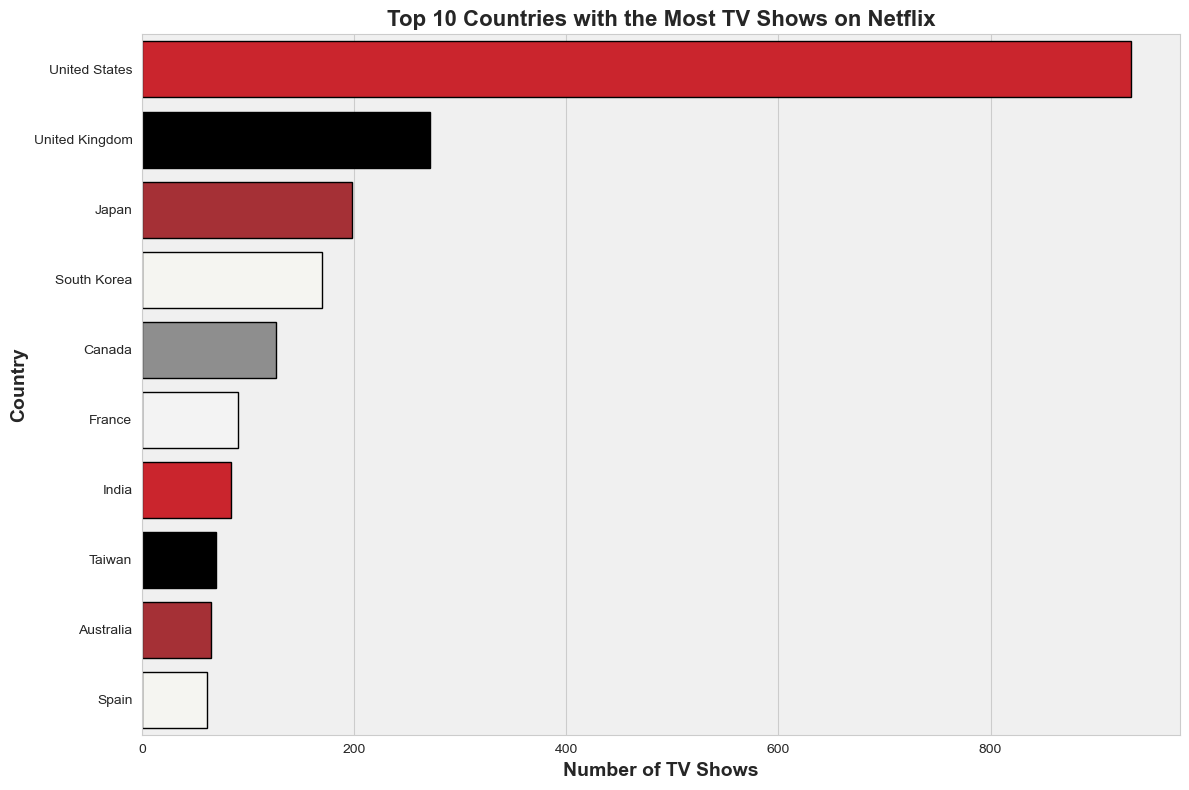

In [49]:
# Create a DataFrame
df_country_shows = pd.DataFrame(top_10_countries)

# Sort the DataFrame by the number of shows
df_country_shows = df_country_shows[df_country_shows ['Country'] != 'Unknown country']
df_country_shows = df_country_shows.sort_values(by='Number of Shows', ascending=False)

# Define a custom color palette inspired by Netflix's theme
netflix_palette = ['#E50914', '#000000', '#B81D24', '#F5F5F1', '#8E8E8E', '#F3F3F3']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Number of Shows', y='Country', data=df_country_shows, palette=netflix_palette)

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Add a black border around each bar
for patch in ax.patches:
    patch.set_edgecolor('black')

# Add title and labels
plt.title('Top 10 Countries with the Most TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of TV Shows', fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Insights:

* From the bar graph, it is evident that the United States is the leading market for Netflix TV Shows, with a substantial number of 932 titles. This suggests a strong foothold and popularity of Netflix among American viewers. 
* Following the United States, the United Kingdom and Japan also show significant numbers of TV Shows, with 271 and 198 titles respectively, indicating Netflix's growing presence and popularity in these regions.
* Netflix's inclusion of shows from countries like the Canada, France, and others underscores its commitment to serving a diverse global audience. This approach allows Netflix to offer content that aligns with the cultural and linguistic preferences of various regions.

### 📅 Best Month to launch a TV show/Movie?

In [50]:
month = df.groupby('month_added')['type'].value_counts()
month.name = 'count' # to avoid error while doing reset_index
month = month.reset_index()
month

,month_added,type,count
0,April,Movie,550
1,April,TV Show,214
2,August,Movie,519
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,266
6,February,Movie,382
7,February,TV Show,181
8,January,Movie,546
9,January,TV Show,192


In [51]:
week = df.groupby('week_added')['type'].value_counts()
week.name = 'count'
week = week.reset_index()
week

,week_added,type,count
0,1,Movie,316
1,1,TV Show,56
2,2,Movie,78
3,2,TV Show,30
4,3,Movie,81
5,3,TV Show,32
6,4,Movie,56
7,4,TV Show,32
8,5,Movie,135
9,5,TV Show,73


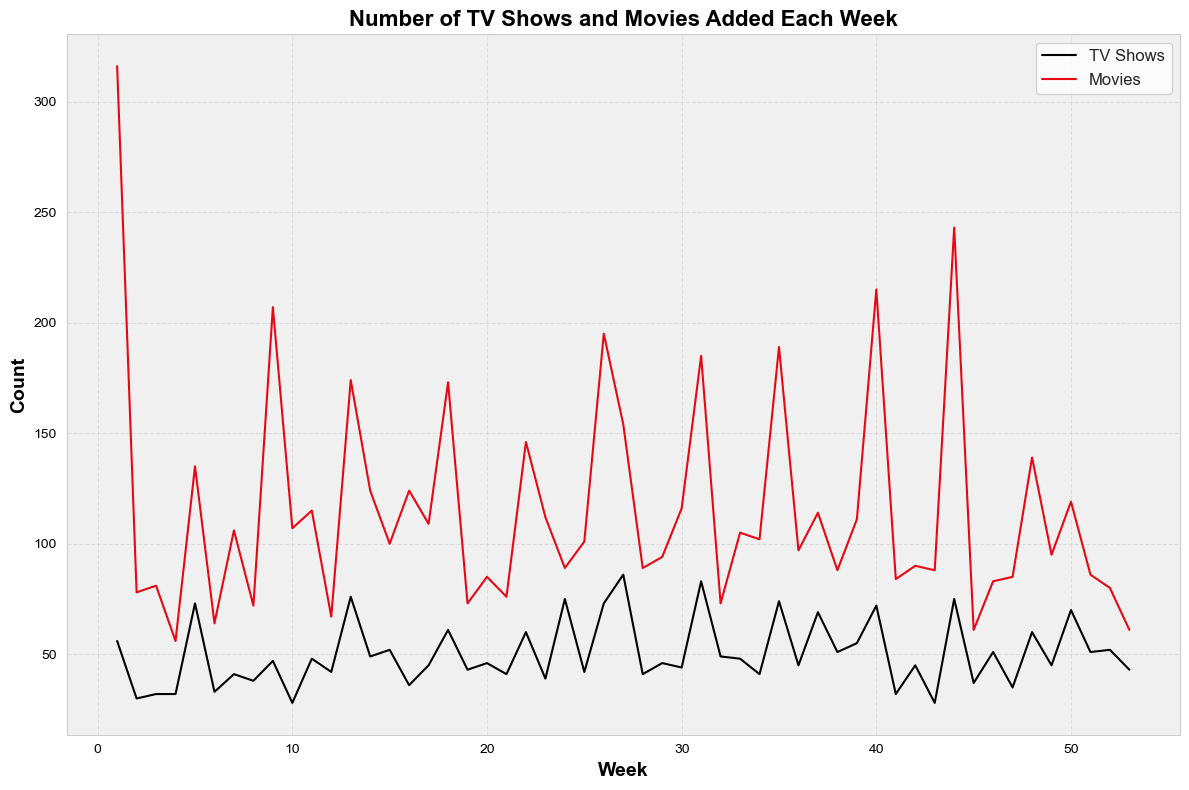

In [52]:
# Define a custom color palette inspired by Netflix's theme
netflix_red = '#E50914'
netflix_black = '#000000'
netflix_background = '#f0f0f0'

# Set background color
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(netflix_background)


# Count the total number of TV shows and movies added each week
tv_shows_by_week = df[df['type'] == 'TV Show'].groupby('week_added').size().reset_index(name='TV Shows')
movies_by_week = df[df['type'] == 'Movie'].groupby('week_added').size().reset_index(name='Movies')

# Merge the dataframes
merged_weekly_data = pd.merge(tv_shows_by_week, movies_by_week, on='week_added', how='outer')

# Plot the data for the best week to release TV shows and movies
sns.lineplot(data=merged_weekly_data, x='week_added', y='TV Shows', label='TV Shows', color=netflix_black)
sns.lineplot(data=merged_weekly_data, x='week_added', y='Movies', label='Movies', color=netflix_red)
plt.title('Number of TV Shows and Movies Added Each Week', fontsize=16, fontweight='bold', color=netflix_black)
plt.xlabel('Week', fontsize=14, fontweight='bold', color=netflix_black)
plt.ylabel('Count', fontsize=14, fontweight='bold', color=netflix_black)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(color=netflix_black)
plt.yticks(color=netflix_black)
plt.tight_layout()
plt.show()

### Insights:
* The weekly upload count of both movies and TV shows shows a remarkably similar trend in terms of spikes and dips.
* A distinct pattern is noticeable: there's a significant increase in content uploads during a specific week, followed by three weeks of reduced content addition. This pattern suggests a monthly cycle where most content is uploaded during the first week and the initial week of the subsequent month.
* The highest volume of movies is typically uploaded during the first week of the year.
* TV shows tend to have their highest volume of uploads around the 26th week, which is around June's end.

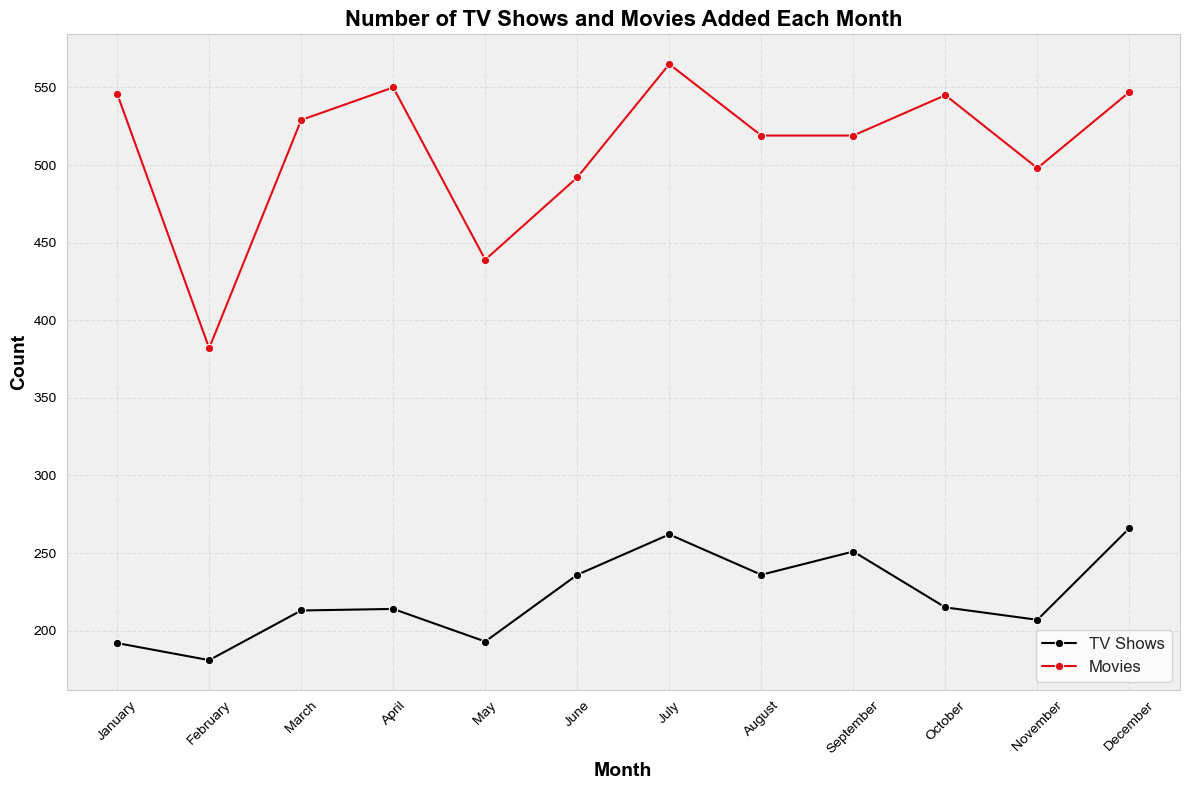

In [53]:
# Count the total number of TV shows and movies added each week
tv_shows_by_month = df[df['type'] == 'TV Show'].groupby('month_added').size().reset_index(name='TV Shows')
movies_by_month = df[df['type'] == 'Movie'].groupby('month_added').size().reset_index(name='Movies')


# Sort the DataFrame by months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_shows_by_month_sorted = tv_shows_by_month.sort_values(by='month_added', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
movies_by_month_sorted = movies_by_month.sort_values(by='month_added', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Set background color
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(netflix_background)

# Plot the data for the best month to release TV shows and movies
sns.lineplot(data=tv_shows_by_month_sorted, x='month_added', y='TV Shows', marker='o', label='TV Shows', color=netflix_black)
sns.lineplot(data=movies_by_month_sorted, x='month_added', y='Movies', marker='o', label='Movies', color=netflix_red)
plt.title('Number of TV Shows and Movies Added Each Month', fontsize=16, fontweight='bold', color=netflix_black)
plt.xlabel('Month', fontsize=14, fontweight='bold', color=netflix_black)
plt.ylabel('Count', fontsize=14, fontweight='bold', color=netflix_black)
plt.xticks(rotation=45, color=netflix_black)
plt.yticks(color=netflix_black)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Insights:
* Holiday seasons, especially January and December, show significant spikes in content uploads.
* On the other hand, content additions are relatively lower in February, May, and November.
* Netflix can strategically plan higher content releases during peak months like July, August, October, and December.
* They may opt for fewer releases during months with lower content additions, based on insights into historical viewer preferences and behavior.

### Analysis of actors/directors of different types of shows/movies.

### 🎥Directors with the Most Appearances

* Top 10 directors who have appeared in most movies or TV shows.

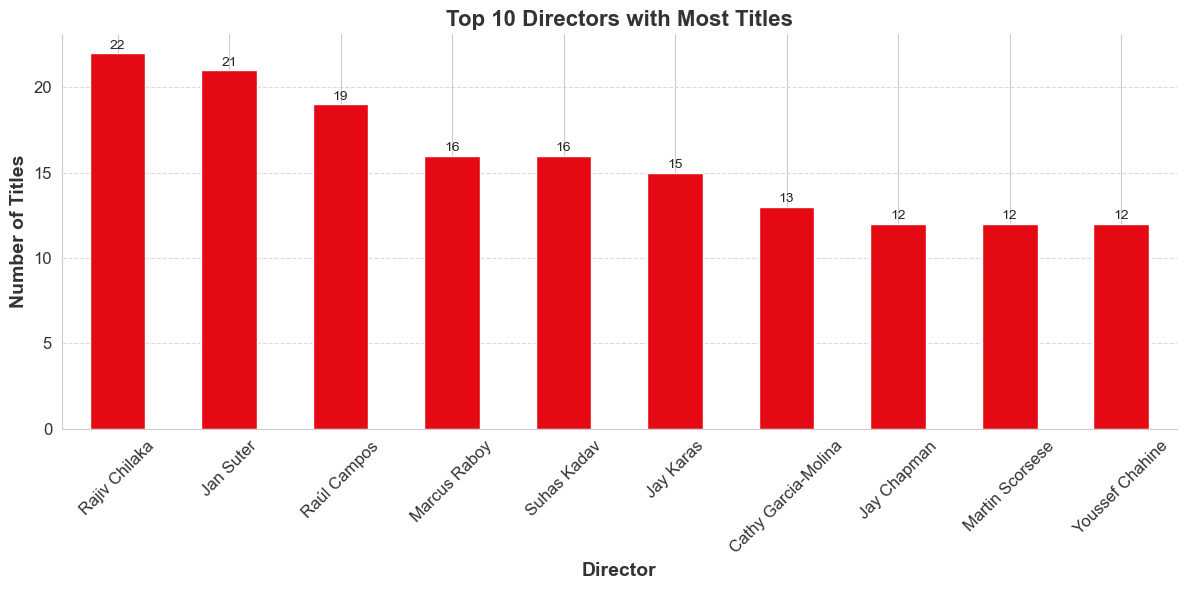

In [54]:
# Grouping by director and counting the number of unique titles
df_director = df1[df1['director'] != 'Unknown Director']
director_counts = df_director.groupby('director')['title'].nunique()

# Top 10 directors who have appeared in most movies or TV shows
top_directors = director_counts.nlargest(10)

# Plotting with Netflix theme
plt.figure(figsize=(12, 6))
ax = top_directors.plot(kind='bar', color='#E50914')  # Netflix red

# Adding labels and title
plt.title('Top 10 Directors with Most Titles', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Director', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Number of Titles', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels
for i, value in enumerate(top_directors):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Insights:

* The bar chart displays the top 10 directors with the most movies or TV shows. Rajiv Chilaka seems to have directed the most content in the Netflix library.

### 👨🏽‍🎤Actor's with the Most Appearances

* Top 10 Actor's who have appeared in most movies or TV shows.

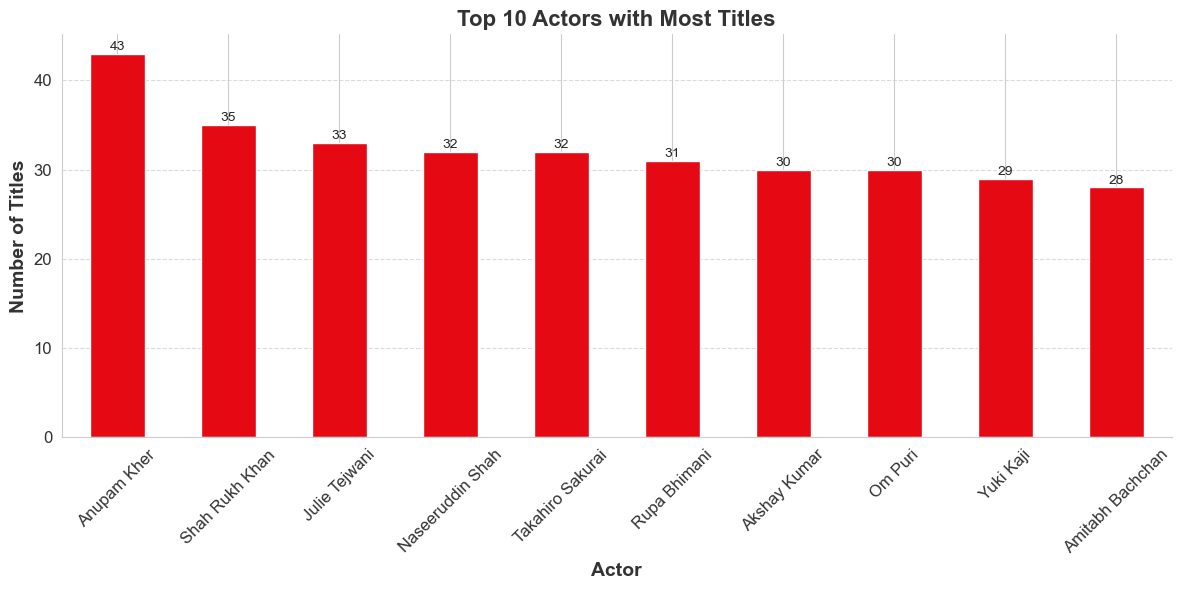

In [55]:
# Grouping by actors and counting the number of unique titles
df_actor = df1[df1['cast'] != 'Unknown cast']
actor_counts = df_actor.groupby('cast')['title'].nunique()

# Top 10 actors who have appeared in most movies or TV shows
top_actors = actor_counts.nlargest(10)

# Plotting with Netflix theme
plt.figure(figsize=(12, 6))
ax = top_actors.plot(kind='bar', color='#E50914')  # Netflix red

# Adding labels and title
plt.title('Top 10 Actors with Most Titles', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Actor', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Number of Titles', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels
for i, value in enumerate(top_actors):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Insights:

* The bar chart shows that Anupam Kher has the highest appearances in movies and TV shows.

### Top 10 Categories by Movie/TV Show Count

In [56]:
colors

['#E50914', 'black']

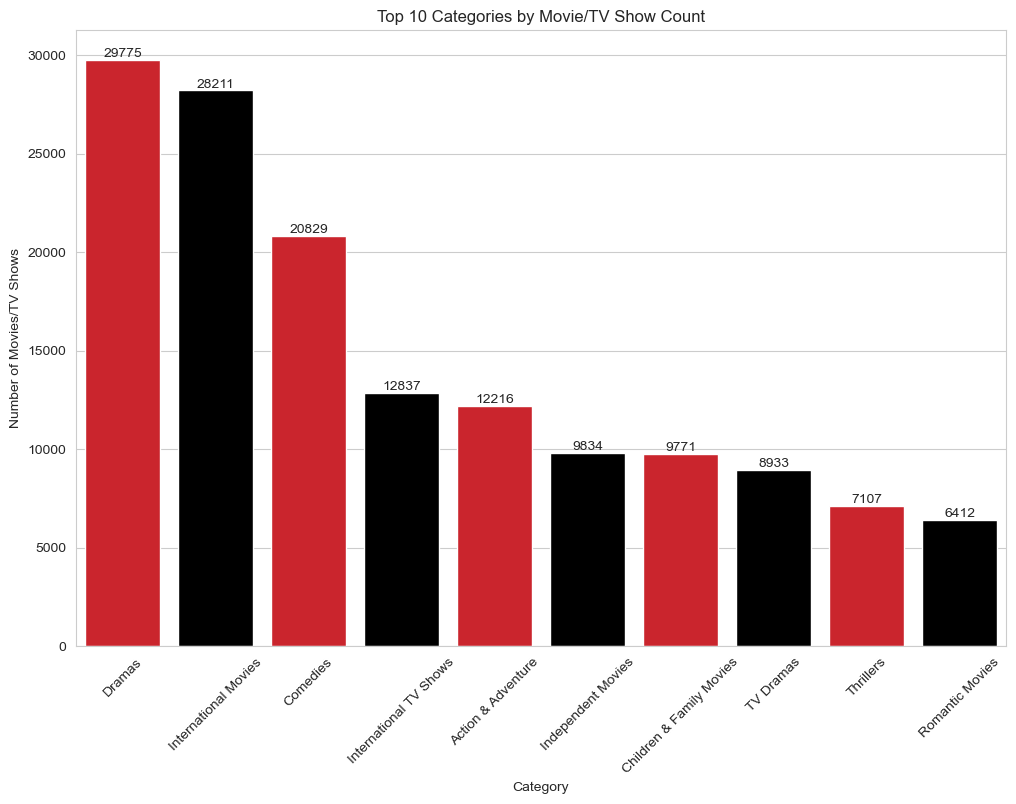

In [57]:
df1['listed_in'] = df1['listed_in'].str.strip()

# Count the occurrences of each actor
listed_in_counts = df1['listed_in'].value_counts()

# Select the top 10 actors
top_10_listed_in = listed_in_counts.head(10)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_10_listed_in.index, y=top_10_listed_in.values, palette=colors)

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Categories by Movie/TV Show Count')
plt.xticks(rotation=45)

# Add count values on top of each bar
for index, value in enumerate(top_10_listed_in.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

## Insights:

* **Dramas Dominate**: Dramas are the most prevalent genre on Netflix, indicating their widespread appeal and popularity among viewers.
* **International Content**: Both international movies and TV shows have a strong presence, highlighting Netflix's commitment to offering diverse global content.
* **Variety in Entertainment**: Alongside dramas, comedies, and action & adventure genres, there's a significant audience for independent movies, children & family movies, and romantic movies, showcasing the platform's wide-ranging entertainment offerings.

# Checking Genres for Movies/TV Show using wordcloud

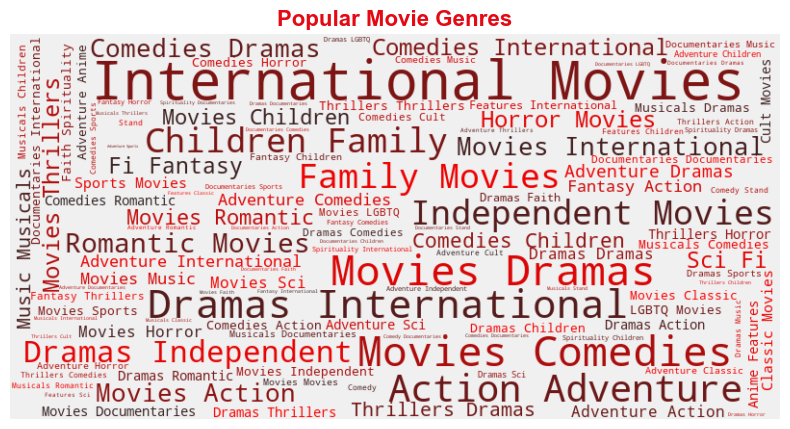

In [58]:
# Define a custom color palette inspired by Netflix's theme
netflix_red = '#E50914'
netflix_black = '#000000'
netflix_background = '#f0f0f0'

df_genre = df1[df1['type'] == 'Movie']

# Combine all genres into a single string
genres = ' '.join(df_genre['listed_in'])

color = sns.color_palette("dark:red", as_cmap=True)

# Generate word cloud with vibrant colors
wordcloud = WordCloud(width=800, height=400, background_color=netflix_background, colormap = color).generate(genres)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Popular Movie Genres', fontsize=16, fontweight='bold', color=netflix_red)
plt.axis('off')
plt.show()

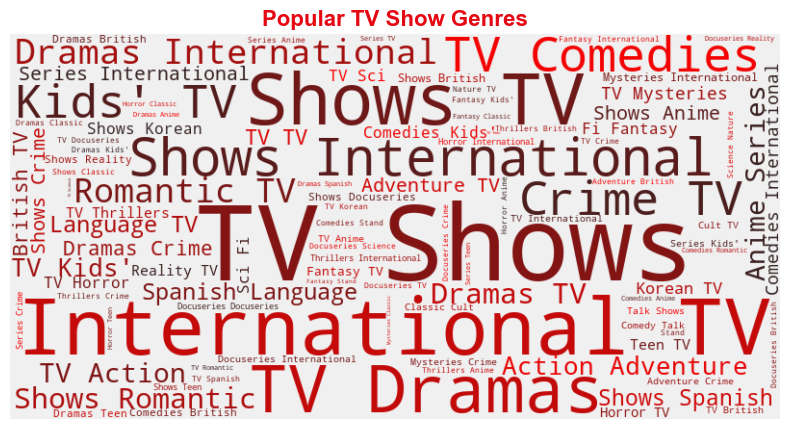

In [59]:
# Define a custom color palette inspired by Netflix's theme
netflix_red = '#E50914'
netflix_black = '#000000'
netflix_background = '#f0f0f0'

df_genre = df1[df1['type'] == 'TV Show']

# Combine all genres into a single string
genres = ' '.join(df_genre['listed_in'])

color = sns.color_palette("dark:red", as_cmap=True)

# Generate word cloud with vibrant colors
wordcloud = WordCloud(width=800, height=400, background_color=netflix_background, colormap = color).generate(genres)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Popular TV Show Genres', fontsize=16, fontweight='bold', color=netflix_red)
plt.axis('off')
plt.show()

### Insights:
    
* On Netflix, popular movie genres include International Movies, Comedies, Dramas, Action, and Romantic films.

* For TV Shows, popular genres on Netflix comprise Drama, Crime, Romance, Kids' content, Comedies, and International series.

### Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)?

In [60]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Calculate the difference in days between 'date_added' and 'release_year'
df['days_to_add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Calculate the mode of 'days_to_add'
mode_days_to_add = df['days_to_add'].mode()[0]

print("After how many days the movie will be added to Netflix after the release of the movie (mode):", mode_days_to_add, "days")

After how many days the movie will be added to Netflix after the release of the movie (mode): 334 days


In [61]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38,633
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38,266
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,38,266
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,38,266
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,38,266


In [62]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [63]:
# Define a function to classify ratings into age groups
def classify_rating(rating):
    if rating in ['G', 'TV-Y', 'TV-Y7', 'TV-G']:
        return 'Little Kids'
    elif rating in ['PG', 'TV-Y7-FV', 'TV-PG']:
        return 'Older Kids'
    elif rating in ['PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['R', 'TV-MA', 'NC-17', 'NR']:
        return 'Adults'
    else:
        return 'Other'

In [64]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,38


In [65]:
df_2 = df1[df1['country'] != 'Unknown country'].reset_index()
df_2['country'].unique()

array(['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China',
       'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea',
       'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand',
       'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel',
       'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait',
       'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden',
       'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Senegal', 'Serbia', 'Ma

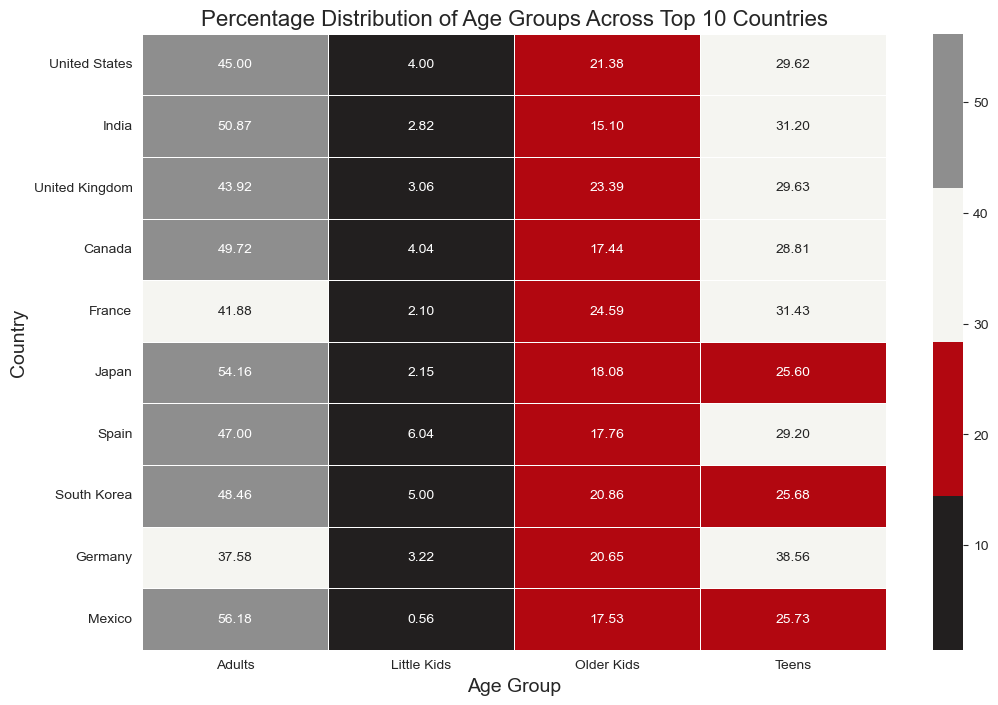

In [66]:
# Creating a new column for age groups
df1['age_group'] = df_2['rating'].apply(classify_rating)

# Group by country and age group, then calculate the percentage of each age group for each country
country_age_group = df1.groupby(['country', 'age_group']).size().unstack().fillna(0)
country_age_group['Total'] = country_age_group.sum(axis=1)
country_age_group_percentage = (country_age_group.div(country_age_group['Total'], axis=0) * 100).round(2)

# Find the top 10 countries based on overall content count
top_10_countries = df_2.groupby('country')['title'].nunique().sort_values(ascending=False).head(10).index

# Filter the percentage DataFrame for only the top 10 countries
country_age_group_percentage_top10 = country_age_group_percentage.loc[top_10_countries]

# Remove the 'Total' column
country_age_group_percentage_top10 = country_age_group_percentage_top10.drop('Total', axis=1)

# Assign Netflix palette
netflix_palette = ['#221f1f', '#b20710', '#f5f5f1', '#8e8e8e']

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_age_group_percentage_top10, cmap=netflix_palette, annot=True, fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Percentage Distribution of Age Groups Across Top 10 Countries', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.show()

🔍 Insights

* Teen-Centric Content in India, Japan, and South Korea:India and Japan show a notable emphasis on content targeted at "Teens," with Japan extending this trend to "Older Kids" as well. This suggests a growing demand for youth-centric content in these regions.
* Adult-Centric Content in Spain, Mexico, Germany, and France:Spain, Mexico, Germany, and France exhibit higher percentages of content aimed at "Adults." This indicates a cultural preference for more mature and adult-oriented content in these countries.
* Balanced Content in USA, UK, and Canada:USA, UK, and Canada display a balanced distribution of age groups in Netflix content, indicating a similar preference or taste among these markets. This suggests a broader appeal and diverse content consumption habits in these regions.

#### Business Recommendations:

**Investment in Localized Content**:
* Cater to local preferences by producing content tailored to different cultural and linguistic preferences worldwide.
* Increase investment in Asian TV shows, particularly from South Korea and Japan, to capitalize on their popularity.
* Prioritize curating a diverse and engaging movie library to cater to European viewers' preferences.
* Maintain focus on content production in the USA and India, given their significant markets.

**Strategic Release Timing**:
* Monthly Strategy: Focus on releasing high-quality content in January, July, August, October, and December to align with periods of higher viewer demand.
* Weekly Strategy: Designate the first week of each month as a "Featured Release Week" for major content releases, utilizing subsequent weeks for promotion and highlighting existing content.

**Age-Targeted Content Expansion**:
* For teen-centric markets like India and Japan, develop original series and movies that resonate with teenage audiences through partnerships with local production studios.
* Create mature and sophisticated original content for adult-centric markets like Spain, Mexico, Germany, and France, aligning with cultural sensibilities.

**Diverse Runtimes** :
* Produce standard-length films alongside medium-length films to cater to varied viewer preferences for depth and storytelling.
* Focus on producing shorter TV series and limited series formats to match viewer preferences for consuming content in manageable episodes.

**Optimizing Content Acquisition Strategy**:
* Acquire more recent movies and reduce the time gap between theatrical release and availability on the platform to meet the audience's preference for up-to-date content.